In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
# import ugradio as ugr

# full width notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Tick formatting
from matplotlib.ticker import MultipleLocator

# General plot parameters
from pylab import rcParams
rcParams["axes.linewidth"]  = 2
rcParams["font.size"]  = 14



# Retina format plots
%config InlineBackend.figure_format = 'retina'


# Figure Insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
divisor = 5
sample_freq = (62.5 / divisor) * u.MHz 
dt = (1 / sample_freq).to(u.ns)

N_samples = 16000

# sampling_time = (N_samples * dt).to(u.s)
times = np.arange(0,N_samples) * dt.to(u.us)

# freqs = (np.fft.fftfreq(N_samples, d=dt)).to(u.MHz)
scaling_factor = 1.0 / np.iinfo(np.int16).max

In [3]:
# 2 MHz & 2.15MHz
peaksN_64_2_215 =  np.loadtxt('peaksN_64_2_215.csv',delimiter = ',')
peaksN_128_2_215 =  np.loadtxt('peaksN_128_2_215.csv',delimiter = ',')
peaksN_256_2_215 =  np.loadtxt('peaksN_256_2_215.csv',delimiter = ',')

# 2 MHz & 2.05MHz
peaksN_128_2_205 =  np.loadtxt('peaksN_128_2_205.csv',delimiter = ',')
peaksN_256_2_205 =  np.loadtxt('peaksN_256_2_205.csv',delimiter = ',')
peaksN_512_2_205 =  np.loadtxt('peaksN_512_2_205.csv',delimiter = ',')

res_freq_data = np.array([peaksN_64_2_215,
                          peaksN_128_2_215,
                          peaksN_256_2_215,
                          peaksN_128_2_205,
                          peaksN_256_2_205,
                          peaksN_512_2_205
                         ])

In [4]:
def dft_f_range(dft_samples = 2**7):
    delta_nu = (1 / (dft_samples * dt.to(u.s))).to(u.MHz) # Freq per dft bin
    return delta_nu.value * (np.arange(0,dft_samples) - dft_samples/2)

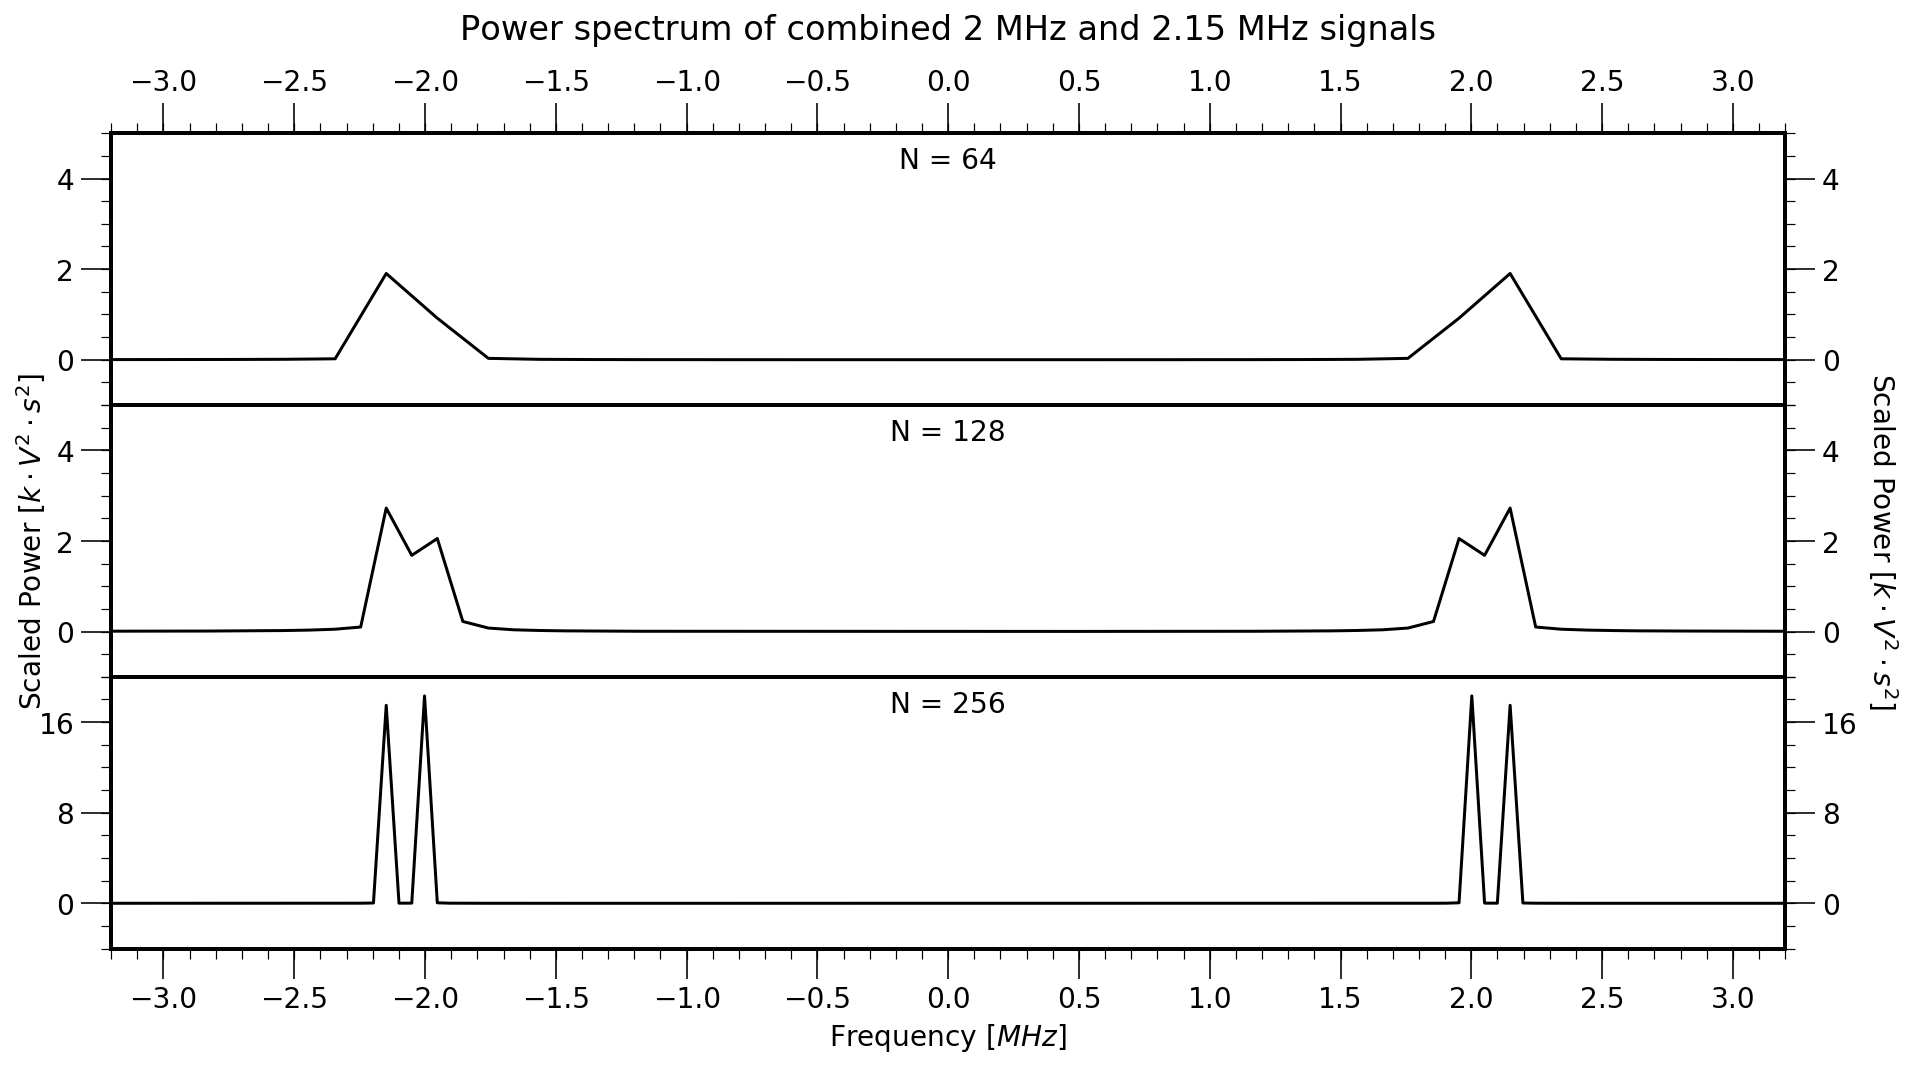

In [88]:
N_values = [64,128,256]

PLOT_SCALE = 1e11

fig, axes = plt.subplots(3,1, figsize = (15,7.5))

for i , ax in enumerate(axes.reshape(-1)):
            
    ax.plot(dft_f_range(N_values[i]),
            res_freq_data[i] / PLOT_SCALE,
            color = 'black')
    

    ax.text(0.5, 0.9,
            'N = %d' %N_values[i],
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

    
    ax.set_xlim(-3.2,3.2)
    ax.set_xticks([])
    
    
    # set ticks for left side of plotgrid
    if i != 2:
        ax.set_ylim(-1,5)
        ax.yaxis.set_major_locator(MultipleLocator(2))
        ax.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(2))
        ax_right.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
        if i == 1:
            ax_right.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$', rotation = 270, labelpad = 30)


    else:
        ax.set_ylim(-4,20)
        ax.yaxis.set_major_locator(MultipleLocator(8))
        ax.yaxis.set_minor_locator(MultipleLocator(2)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(8))
        ax_right.yaxis.set_minor_locator(MultipleLocator(2)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)


    
    if i == 0:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ax_top.set_xticks(np.arange(-3,4))
        ax_top.xaxis.set_major_locator(MultipleLocator(0.5))
        ax_top.xaxis.set_minor_locator(MultipleLocator(0.1))  
        ax_top.tick_params(which='major', length = 15)
        ax_top.tick_params(which='minor', length = 5)
        ax.set_title(r'Power spectrum of combined 2 MHz and 2.15 MHz signals', y = 1.3)


        
    if i == 1:
        ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$')
        
    if i == 2:
        ax.set_xticks(np.arange(-3,4))
        ax.xaxis.set_major_locator(MultipleLocator(0.5))
        ax.xaxis.set_minor_locator(MultipleLocator(0.1))
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        
        ax.set_xlabel(r'Frequency $[MHz]$')
        

plt.subplots_adjust(hspace=0, wspace = 0)  
plt.show()
fig.savefig('frequency_resolution_2_215_3_5.pdf', dpi = 'figure', format = 'pdf', transparent = True)

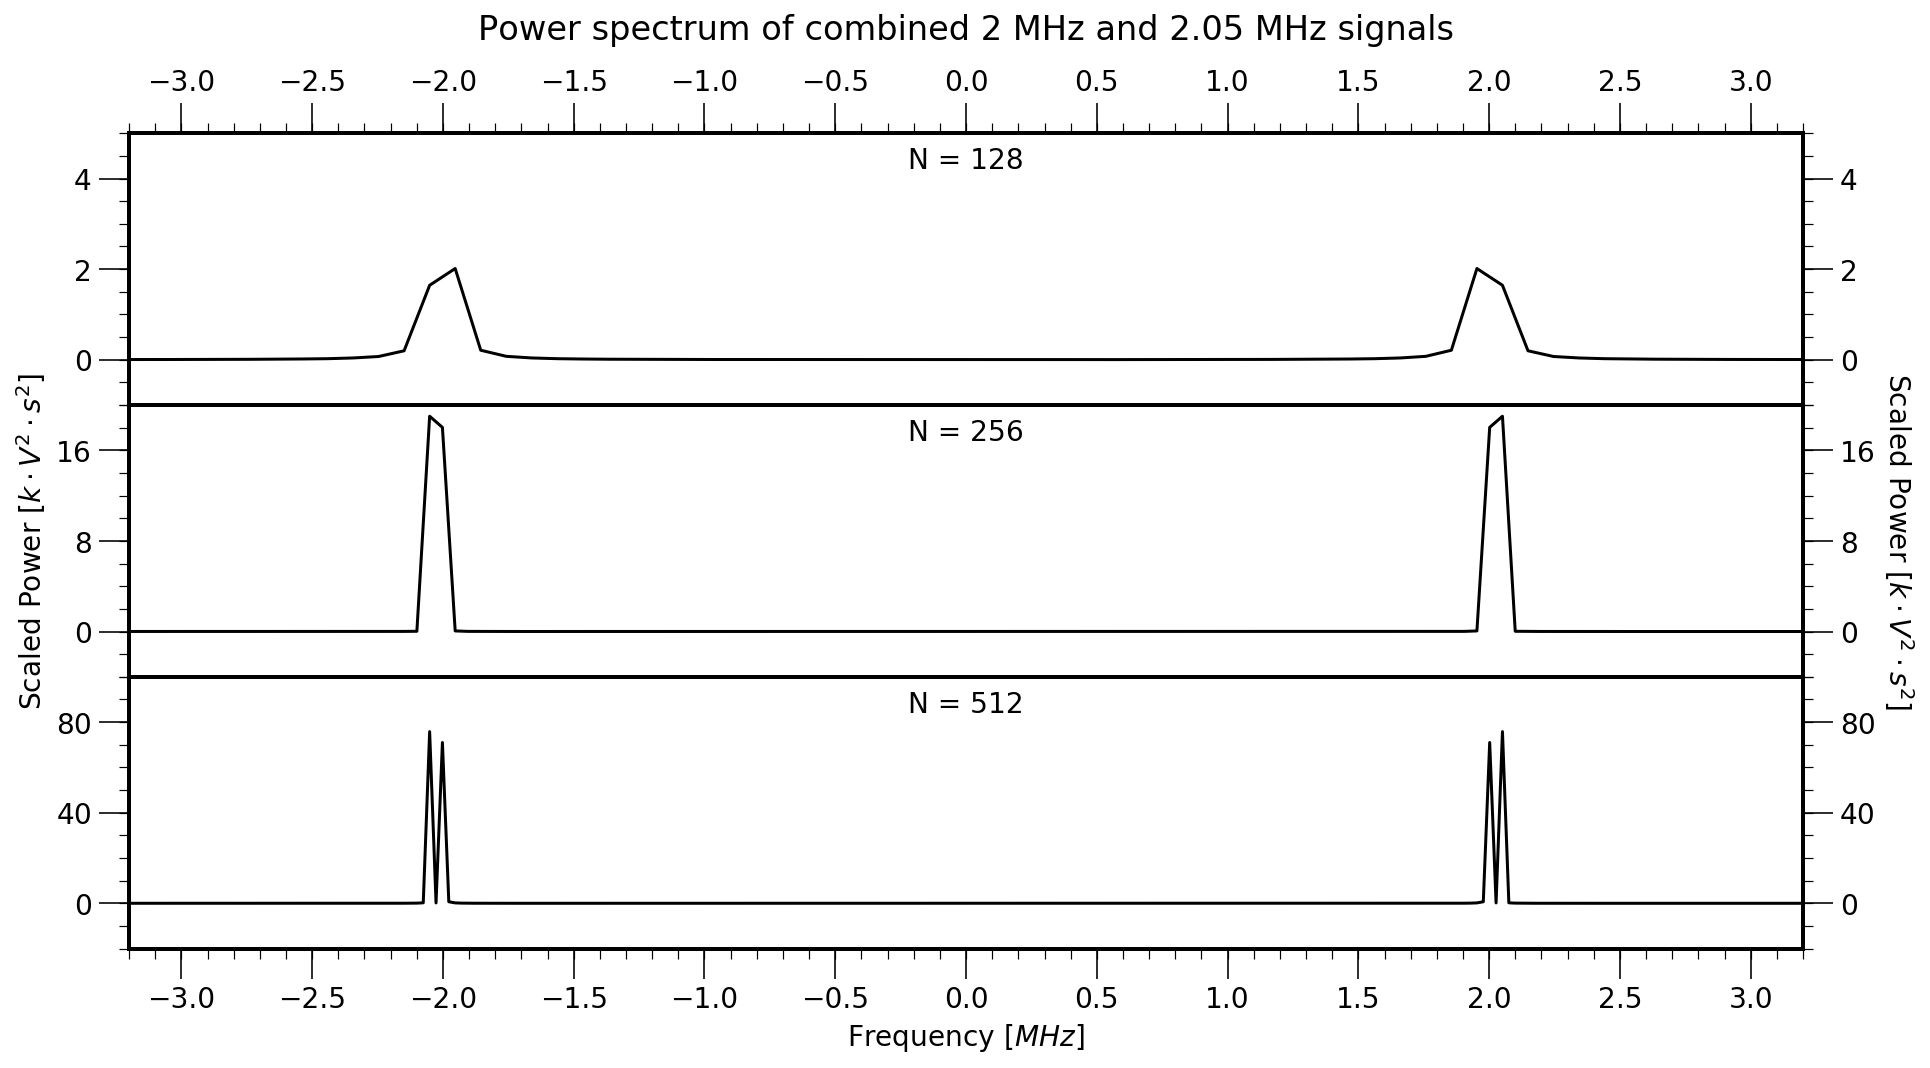

In [6]:
N_values = [128,256,512]

PLOT_SCALE = 1e11

fig, axes = plt.subplots(3,1, figsize = (15,7.5))

for i , ax in enumerate(axes.reshape(-1)):
            
    ax.plot(dft_f_range(N_values[i]),
            res_freq_data[i + 3] / PLOT_SCALE,
            color = 'black')
    

    ax.text(0.5, 0.9,
            'N = %d' %N_values[i],
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

    
    ax.set_xlim(-3.2,3.2)
    ax.set_xticks([])

    if i == 0:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ax_top.set_xticks(np.arange(-3,4))
        ax_top.xaxis.set_major_locator(MultipleLocator(0.5))
        ax_top.xaxis.set_minor_locator(MultipleLocator(0.1))  
        ax_top.tick_params(which='major', length = 15)
        ax_top.tick_params(which='minor', length = 5)
        ax.set_title(r'Power spectrum of combined 2 MHz and 2.05 MHz signals', y = 1.3)
        
        ax.set_ylim(-1,5)
        ax.yaxis.set_major_locator(MultipleLocator(2))
        ax.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(2))
        ax_right.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)


        
    if i == 1:
        ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$')
        
        ax.set_ylim(-4,20)
        ax.yaxis.set_major_locator(MultipleLocator(8))
        ax.yaxis.set_minor_locator(MultipleLocator(2)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(8))
        ax_right.yaxis.set_minor_locator(MultipleLocator(2)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
        ax_right.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$', rotation = 270, labelpad = 20)


        
    if i == 2:
        ax.set_xticks(np.arange(-3,4))
        ax.xaxis.set_major_locator(MultipleLocator(0.5))
        ax.xaxis.set_minor_locator(MultipleLocator(0.1))
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        
        ax.set_ylim(-20,100)
        ax.yaxis.set_major_locator(MultipleLocator(40))
        ax.yaxis.set_minor_locator(MultipleLocator(10)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(40))
        ax_right.yaxis.set_minor_locator(MultipleLocator(10)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
        
        ax.set_xlabel(r'Frequency $[MHz]$')
        

plt.subplots_adjust(hspace=0, wspace = 0)  
plt.show()
fig.savefig('frequency_resolution_2_205_3_5.pdf', dpi = 'figure', format = 'pdf', transparent = True)

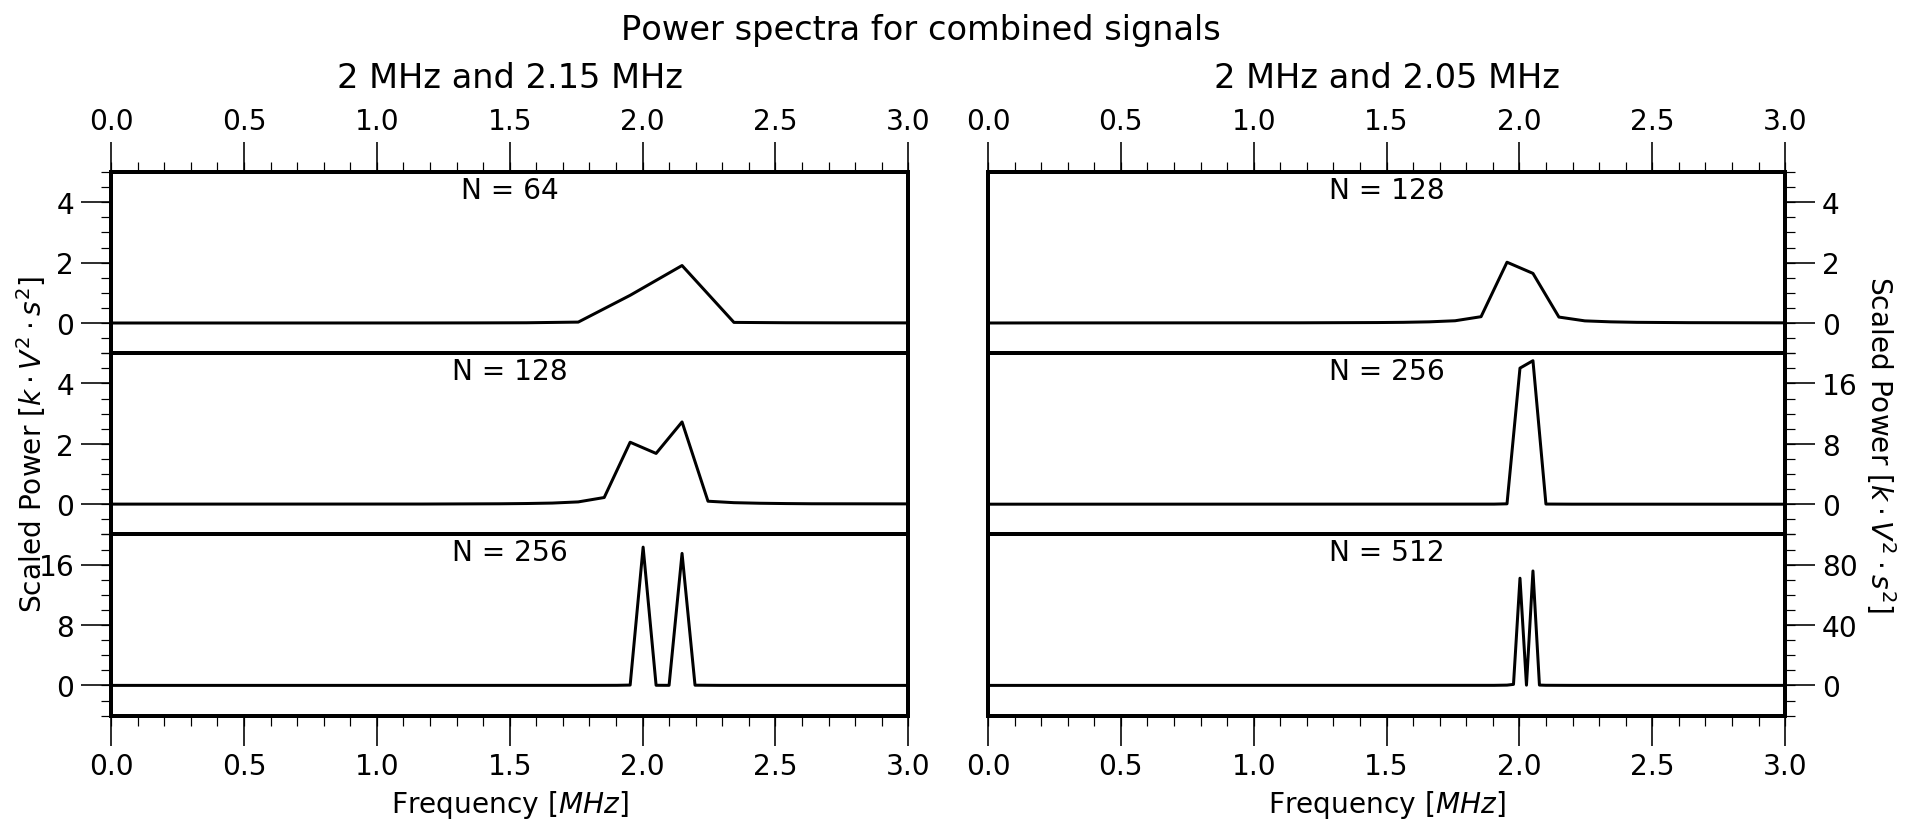

In [94]:
N_values = [64,128,256,128,256,512]

PLOT_SCALE = 1e11

fig, axes = plt.subplots(3,2, figsize = (15,5))

for i , ax in enumerate(axes.T.reshape(-1)):
            
    ax.plot(dft_f_range(N_values[i]),
            res_freq_data[i] / PLOT_SCALE,
            color = 'black')
    

    ax.text(0.5, 0.9,
            'N = %d' %N_values[i],
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
    ax.set_xlim(0, 3)
    ax.set_xticks([])
    ax.set_yticks([])
    
    if i == 0 or i == 3:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ax_top.xaxis.set_major_locator(MultipleLocator(.5))
        ax_top.xaxis.set_minor_locator(MultipleLocator(0.1))  
        ax_top.tick_params(which='major', length = 15)
        ax_top.tick_params(which='minor', length = 5)
        
        
    if i < 2:
        ax.set_ylim(-1,5)
        ax.yaxis.set_major_locator(MultipleLocator(2))
        ax.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        
    if i == 2 or i == 5:
        ax.xaxis.set_major_locator(MultipleLocator(.5))
        ax.xaxis.set_minor_locator(MultipleLocator(0.1))
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)
        ax.set_xlabel(r'Frequency $[MHz]$')
        
    if i == 1:    
        ax.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$')


        
    if i == 2:
        ax.set_ylim(-4,20)
        ax.yaxis.set_major_locator(MultipleLocator(8))
        ax.yaxis.set_minor_locator(MultipleLocator(2)) 
        ax.tick_params(which='major', length = 15)
        ax.tick_params(which='minor', length = 5)


        
    if i == 3:
        ax.set_ylim(-1,5)
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(2))
        ax_right.yaxis.set_minor_locator(MultipleLocator(0.5)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
        
    if i == 4:
        ax.set_ylim(-4,20)
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(8))
        ax_right.yaxis.set_minor_locator(MultipleLocator(2)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
        ax_right.set_ylabel(r'Scaled Power $[k \cdot V^2 \cdot s^2]$', rotation = 270, labelpad = 20)


        
    if i == 5:
        ax.set_ylim(-20,100)
        ax_right = ax.twinx()
        ax_right.set_ylim(ax.get_ylim())
        ax_right.yaxis.set_major_locator(MultipleLocator(40))
        ax_right.yaxis.set_minor_locator(MultipleLocator(10)) 
        ax_right.tick_params(which='major', length = 15)
        ax_right.tick_params(which='minor', length = 5)
        
        
    
axes[0,0].set_title('2 MHz and 2.15 MHz', y = 1.4)
axes[0,1].set_title('2 MHz and 2.05 MHz', y = 1.4)


    
fig.suptitle('Power spectra for combined signals', y = 1.1)
plt.subplots_adjust(hspace=0, wspace = 0.1)      
plt.show()
fig.savefig('frequency_resolution_3_5.pdf', dpi = 'figure', format = 'pdf', transparent = True, bbox_inches = 'tight')